# Reinforcement Learning: Multi-Armed Bandit

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
plt.style.use('seaborn')

In [2]:
def average_rewards(n_experiments=1000, # Set the number of experiments
                    steps=10000, # Set the number of steps
                    k=10, # Set the number of arms of the Multi-Armed bandit
                    optimistic = 0, # Set optimistic action values estimates at start up
                    epsilon=0.1, # Set the proportion of exploration
                    alpha=None, # Set constant step-size parameter
                    beta=False
                    ):

    # Record start time
    t0 = time.clock()
    
    averages = np.zeros([steps]) # Initialize averages
    
    experiments_j = 0 # Initialize experiment count
    
    if alpha is None:
        for j in range(n_experiments):
            experiments_j += 1 # Update experiment index
            q_star = np.random.normal(0, 1, k) # Set actual action values
            step = np.zeros([k]) # Initialize step counter
            Q = np.zeros([k]) + optimistic # Initialize action values estimates
            avg=[] # Initialize average
            avg.append(0)
            
            for j in range(steps):
                exploration = np.random.uniform() < epsilon # Draw between exploration and exploitation
                index = (not exploration)*np.random.choice(np.where(Q == Q.max())[0]) + exploration*np.random.randint(0,k)
                step[index]+=1
                r=np.random.normal(q_star[index], 1) # Compute reward
                Q[index]= Q[index] + (r-Q[index])/step[index] # Update action values estimates
                r=avg[-1]+(r-avg[-1])/np.sum(step) # Update average reward
                avg.append(r)
                # q_star=q_star+np.random.normal(0, 0.01, k)
            avg.pop(0)       
            averages = averages + (avg-averages)/experiments_j
    else:
        if not(beta):
            for j in range(n_experiments):
                experiments_j += 1 # Update experiment index
                q_star = np.random.normal(0, 1, k) # Set actual action values
                step = np.zeros([k]) # Initialize step counter
                Q = np.zeros([k]) + optimistic # Initialize action values estimates
                avg=[] # Initialize average
                avg.append(0)
                
                for j in range(steps):
                    exploration = np.random.uniform() < epsilon # Draw between exploration and exploitation
                    index = (not exploration)*np.random.choice(np.where(Q == Q.max())[0]) + exploration*np.random.randint(0,k)
                    step[index]+=1
                    r=np.random.normal(q_star[index], 1) # Compute reward
                    Q[index]= Q[index] + (r-Q[index])*alpha # Update action values estimates
                    r=avg[-1]+(r-avg[-1])/np.sum(step) # Update average reward
                    avg.append(r)
                    # q_star=q_star+np.random.normal(0, 0.01, k)
                avg.pop(0)       
                averages = averages + (avg-averages)/experiments_j
        else:
            for j in range(n_experiments):
                experiments_j += 1 # Update experiment index
                q_star = np.random.normal(0, 1, k) # Set actual action values
                step = np.zeros([k]) # Initialize step counter
                Q = np.zeros([k]) + optimistic # Initialize action values estimates
                avg=[] # Initialize average
                avg.append(0)
                o=0
                
                for j in range(steps):
                    exploration = np.random.uniform() < epsilon # Draw between exploration and exploitation
                    index = (not exploration)*np.random.choice(np.where(Q == Q.max())[0]) + exploration*np.random.randint(0,k)
                    step[index]+=1
                    r=np.random.normal(q_star[index], 1) # Compute reward
                    o = o + alpha*(1-o)
                    beta_ = alpha/o
                    Q[index]= Q[index] + (r-Q[index])*beta_ # Update action values estimates
                    r=avg[-1]+(r-avg[-1])/np.sum(step) # Update average reward
                    avg.append(r)
                    # q_star=q_star+np.random.normal(0, 0.01, k)
                avg.pop(0)       
                averages = averages + (avg-averages)/experiments_j
    print(time.clock()-t0)
    
    return averages

In [3]:
# Compute results
averages_random=average_rewards(epsilon=1)
averages_greedy=average_rewards(epsilon=0)
averages_epsilon_greedy=average_rewards(epsilon=0.1)
averages_optimistic_greedy=average_rewards(epsilon=0, optimistic=5)

339.8918387
322.3168201
341.0343703
322.0956252


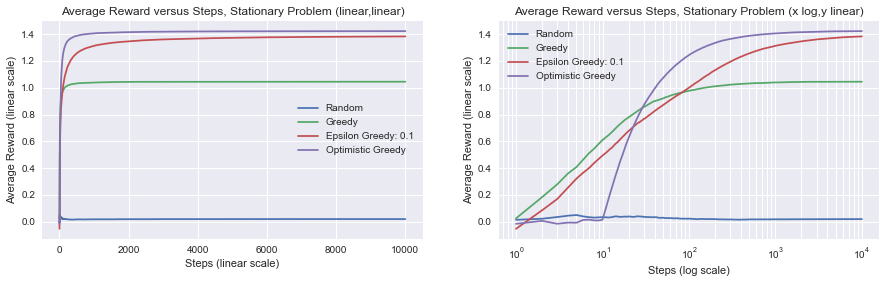

In [4]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,4));
ax1.set_title("Average Reward versus Steps, Stationary Problem (linear, linear)");  
ax1.set_xlabel("Steps (linear scale)");
ax1.set_ylabel("Average Reward (linear scale)");
ax1.grid(visible=True, which='both');

ax2.set_xscale('log');
ax2.set_title("Average Reward versus Steps, Stationary Problem (x log, y linear)");
ax2.set_xlabel("Steps (log scale)");
ax2.set_ylabel("Average Reward (linear scale)");
ax2.grid(visible=True, which='both');

ax1.plot(range(1,len(averages_random)+1),averages_random, label='Random');
ax1.plot(range(1,len(averages_greedy)+1),averages_greedy, label='Greedy');
ax1.plot(range(1,len(averages_epsilon_greedy)+1),averages_epsilon_greedy, label='Epsilon Greedy: 0.1');
ax1.plot(range(1,len(averages_optimistic_greedy)+1),averages_optimistic_greedy, label='Optimistic Greedy');

ax2.plot(range(1,len(averages_random)+1),averages_random, label='Random');
ax2.plot(range(1,len(averages_greedy)+1),averages_greedy, label='Greedy');
ax2.plot(range(1,len(averages_epsilon_greedy)+1),averages_epsilon_greedy, label='Epsilon Greedy: 0.1');
ax2.plot(range(1,len(averages_optimistic_greedy)+1),averages_optimistic_greedy, label='Optimistic Greedy');

ax1.legend();
ax2.legend();